In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#np.seterr(divide='ignore'); # ignore division by zero
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['figure.dpi'] = 100 # resolution

### Equation of the form f(E)=0, where E<0 is energy in main state for the problem where the particle is in a rectangular potential well of size [-a, a] and potential -|U0|

In [3]:
a = 3
U0 = 3
E0 = -0.95
precision=10e-9

$f(\zeta) = \cot \sqrt{2a^2U_0 * (1-\zeta )} - \sqrt{\frac{1}{\zeta}-1}=0$,  
where $\zeta = |E/U0|$

In [4]:
# original function
def f(E):
    return (1/np.tan(np.sqrt(2 * a**2 * U0 * (1 + E/U0)))) - np.sqrt((-U0/E) - 1) 

In [5]:
# derivative of original function
def df(E):
    return - (a ** 2) / ((np.sin(np.sqrt(2 * a * a * U0 * (1 + E/U0))) ** 2) * np.sqrt(2 * a * a * U0 * (1 + E/U0)))\
           - (U0/2)/(E**2*((-U0/E) - 1))      

*Let's find out the estimation to main state energy by:* $\cot \sqrt{2a^2U_0 * (1-\zeta )}=0$  
\
$\cot \sqrt{2a^2U_0 * (1-\zeta )}=0$ \
\
$\sqrt{2a^2U_0 * (1-\zeta )} = \frac{\pi}{2} + \pi n$ ($n=0$ *because of main state*)
\
...
\
$E=\frac{\pi^2}{8a^2} - U_0$ – our estimation to main state

C:\Users\belco\AppData\Local\Temp\ipykernel_17224\929531610.py:3: RuntimeWarning: divide by zero encountered in divide
  return (1/np.tan(np.sqrt(2 * a**2 * U0 * (1 + E/U0)))) - np.sqrt((-U0/E) - 1)


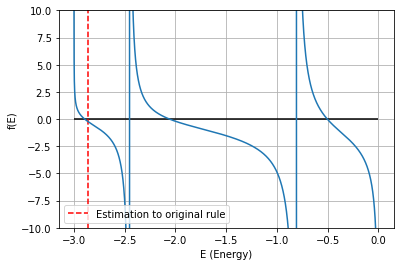

In [6]:
dom = np.linspace(-U0, -0.0, 10000)
val = f(dom)
plt.xlabel("E (Energy)")
plt.ylabel("f(E)")
plt.ylim([-10, 10])
plt.hlines(0, xmin=-U0, xmax=0, colors='k')
plt.vlines(min(0, np.pi**2/(8*a*a)-U0), ymin=-10, ymax=10, colors='red', linestyles='--', label='Estimation to original rule') #red line - initial E
plt.plot(dom, val)
plt.grid()
plt.legend(loc='lower left')
plt.show()

# Dichotomy

In [7]:
def dichotomy(a, b, counterDichotomy=0, error=precision):
    middle = (a + b) / 2
    curError = (b - a) / 2
    if curError < error:
        print("Deep of recursion in Dichotomy: {}".format(counterDichotomy))
        return middle
    counterDichotomy += 1
    return dichotomy(a, middle, counterDichotomy) if f(middle) * f(a) <= 0 else dichotomy(middle, b, counterDichotomy)

*As we show above energy of main state gonna be in ($-U_0$, $\frac{\pi^2}{8a^2} - U_0$)*

In [8]:
dichotomyRoot = dichotomy(-U0, min(0, np.pi**2/(8*a*a)-U0), error=1e-10)
print('Dichotomy root: {}'.format(dichotomyRoot))
print('f({}) = {}'.format(dichotomyRoot, f(dichotomyRoot)))

Deep of recursion in Dichotomy: 23
Dichotomy root: -2.893946610104318
f(-2.893946610104318) = 2.854129663165672e-08


C:\Users\belco\AppData\Local\Temp\ipykernel_17224\929531610.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/np.tan(np.sqrt(2 * a**2 * U0 * (1 + E/U0)))) - np.sqrt((-U0/E) - 1)


which almost zero :)

# Simple Iteration

In [9]:
_lambda = 1 / df(np.pi**2/(8*a**2)-U0) #
def fixedPointIteration(x, counterIter=0, error=precision):
    value = - _lambda * f(x)
    curError = np.abs(dichotomyRoot - x)
    if curError < error:
        print("Deep of recursion in SI: {}".format(counterIter))
        return x
    counterIter += 1
    return fixedPointIteration(x + value, counterIter)

In [10]:
fixPointIterRoot = fixedPointIteration(min(0, np.pi**2/(8*a*a)-U0))
print('Fixed Point Iteration root: {}'.format(fixPointIterRoot))
print('f({}) = {}'.format(fixPointIterRoot, f(fixPointIterRoot)))

Deep of recursion in SI: 10
Fixed Point Iteration root: -2.893946602600548
f(-2.893946602600548) = -2.9149665875527475e-08


# Newton's Method

In [11]:
def Newton(x, counterNewton=0, error=precision):
    value = f(x) / df(x)
    curError = np.abs(fixPointIterRoot - x)
    if curError < error:
        print("Deep of recursion in NM: {}".format(counterNewton))
        return x
    counterNewton += 1
    return Newton(x - value, counterNewton)

In [12]:
newtonRoot = Newton(min(0.1, np.pi**2/(8*a*a)-U0))
print('Newton\'s root: {}'.format(newtonRoot))
print('f({}) = {}'.format(newtonRoot, f(newtonRoot)))

Deep of recursion in NM: 14
Newton's root: -2.8939466005792753
f(-2.8939466005792753) = -4.4689741379722037e-08


 *in FPI method we use static derivative instead of dynamic derivative such in Newton's method and it converges to root faster than FPI*

In [13]:
type(newtonRoot)

numpy.float64